In [2]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.3/10.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.9 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.9 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/10.9 MB 3.7 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/10.9 MB 3.4 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/10.9 MB 3.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/10.9 MB 3.2 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/10.9 MB 3.1 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/10.9 MB 3.2 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/10.9 MB 3.2 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/10.9 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/10.9 MB 3.2 MB/s eta 0:00:02
   ----------

In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans 

In [2]:
image_path = 'D:\\Football_Analysis_Detection\\output_videos\\cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

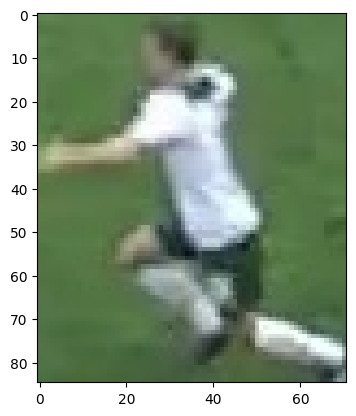

In [3]:
plt.imshow(image)

# take the top half of the image

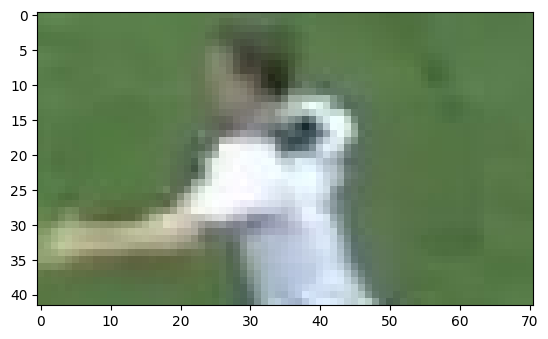

In [4]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

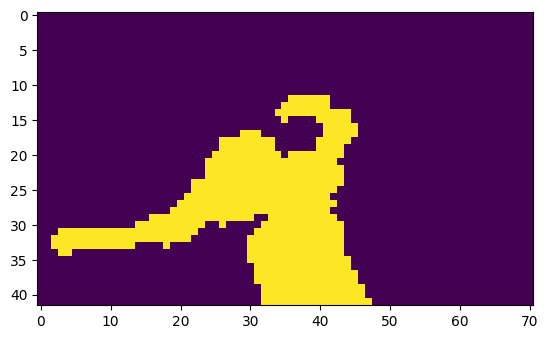

In [6]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [7]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

non_player_cluster

0

In [8]:
player_cluster = 1-non_player_cluster

player_cluster

1

In [9]:
kmeans.cluster_centers_[player_cluster]

array([199.18725869, 208.84749035, 211.17374517])